<a href="https://colab.research.google.com/github/angel870326/Extractive-Text-Summarization/blob/main/dataset_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.11.29 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **AI CUP Dataset**

### **Contents:**

*   Overview of the Dataset
*   Preprocessing
*   Training Set<br/>
    (1) Remove double quotes<br/>
    (2) Unique id
*   Testing Set<br/>
    (1) Remove double quotes<br/>
    (2) Unique id
*   Evaluation - LCS
*   Baseline LCS Score
*   EDA
    *   Testing Set<br/>
        (1) Split to "AGREE" and "DISAGREE"<br/>
        (2) Word count distribution<br/>
        (3) String length distribution<br/>
    *   Training Set<br/>
        (1) Split to "AGREE" and "DISAGREE"<br/>
        (2) Word count distribution<br/>
        (3) Find the summary that is the same as the original text<br/>
        (4) LCS Distribution

*   Split the dataset
    *   Training Set
    *   Testing Set

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## **Overview of the Dataset**

In [ ]:
train_raw = pd.read_csv('/content/gdrive/MyDrive/AI CUP/dataset/Batch_answers - train_data (no-blank).csv').iloc[:,:6]
test_raw = pd.read_csv('/content/gdrive/MyDrive/AI CUP/dataset/Batch_answers - test_data(no_label).csv')

In [ ]:
# Count words in a comment
import string
def word_count(col):
  return train_raw[col].apply(lambda x: len(nltk.word_tokenize(''.join([i for i in x if i not in string.punctuation]))))

In [ ]:
# Training data
train_raw['q_count'] = word_count('q')
train_raw['r_count'] = word_count('r')
train_raw['qr_count'] = train_raw['q_count'] + train_raw['r_count']
train_raw['q_sum_count'] = word_count('q\'')
train_raw['r_sum_count'] = word_count('r\'')
train_raw['qr_sum_count'] = train_raw['q_sum_count'] + train_raw['r_sum_count']

train_raw

,id,q,r,s,q',r',q_count,r_count,qr_count,q_sum_count,r_sum_count,qr_sum_count
0,8,"""It can go both ways . We all doubt . It is wh...","""True .""",AGREE,"""It can go both ways . We all doubt . It is wh...","""True .""",17,1,18,17,1,18
1,8,"""It can go both ways . We all doubt . It is wh...","""True .""",AGREE,"""can go both ways . We all doubt . It is what ...","""True""",17,1,18,16,1,17
2,8,"""It can go both ways . We all doubt . It is wh...","""True .""",AGREE,"""It can go both ways . We all doubt . It is wh...","""True""",17,1,18,17,1,18
3,9,"""once again , you seem to support the killing ...","""based on the idea that people are dispensible...",AGREE,"""seem to support the killing of certain people""","""based on the idea that people are dispensible...",14,58,72,8,14,22
4,9,"""once again , you seem to support the killing ...","""based on the idea that people are dispensible...",AGREE,"""you seem to support the killing of certain pe...","""based on the idea that people are dispensible""",14,58,72,12,8,20
...,...,...,...,...,...,...,...,...,...,...,...,...
38341,10001,"""good thing this argument has never been done ...","""And teen sex does n't , by the very nature of...",DISAGREE,"""You are much better off making theft legal an...","""And teen sex does n't , by the very nature of...",39,37,76,21,13,34
38342,10002,"""I know one thing , anything that happens , po...","""Was n't sinjin crowing about his plans to tak...",DISAGREE,"""I know one thing , anything that happens , po...","""Was n't sinjin crowing about his plans to tak...",114,46,160,16,14,30
38343,10002,"""I know one thing , anything that happens , po...","""Was n't sinjin crowing about his plans to tak...",DISAGREE,"""FBI Arrests Three Men in Terror Plot that Tar...","""Was n't sinjin crowing about his plans to tak...",114,46,160,16,11,27
38344,10003,"""I enjoy Botany more than most things and I ha...","""Hi Smallax , welcome to the forum . I did a s...",AGREE,"""I enjoy Botany more than most things and I ha...","""Hi Smallax , welcome to the forum . I did a s...",76,182,258,19,23,42


In [ ]:
# Testing data
test_raw['q_count'] = word_count('q')
test_raw['r_count'] = word_count('r')
test_raw['qr_count'] = test_raw['q_count'] + test_raw['r_count']

test_raw

,id,q,r,s,q_count,r_count,qr_count
0,6199,"""-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- ...","""If so , why do we still have apes , and why a...",DISAGREE,17,1,18
1,5807,"""There 's a lot of discussion there on that is...","""Of course . The makers of Expelled were withi...",DISAGREE,17,1,18
2,8487,"""`` It 's not helping . The guns these people ...","""Oh , I would wager about like Mexico , about ...",DISAGREE,17,1,18
3,1760,"""Shooting : 3 seriously injured in Auburn shoo...","""Pickup strikes group of four youths | Houston...",AGREE,14,58,72
4,6228,"""This is the argument concerning 'choice ' tha...","""I believe there is a point at which we ( soci...",DISAGREE,14,58,72
...,...,...,...,...,...,...,...
2011,9499,"""You are betraying your belief system .""","""Yep . ( I 'm assuming that by `` belief syste...",AGREE,80,197,277
2012,4611,"""You are in a loud minority , railing against ...","""Being in the minority or in the majority is i...",DISAGREE,80,197,277
2013,9328,"""You bet your XXX that 'd make me happy .""","""Well , first , I probably would n't bet my XX...",DISAGREE,80,197,277
2014,5225,"""you say `` f * * * the Constitution. ``""","""and gun nuts say f * * * the children when we...",DISAGREE,80,197,277


## **Preprocessing**

In [ ]:
# Remove double quotes
def remove_double_quotes(df, col):
  df[col] = df[col].str.slice(1, -1)

### **Training Set**

#### (1) Remove double quotes

In [ ]:
remove_double_quotes(train_raw, 'q')
remove_double_quotes(train_raw, 'r')
remove_double_quotes(train_raw, 'q\'')
remove_double_quotes(train_raw, 'r\'')

#### (2) Unique id

In [ ]:
# Unique id
unique_id = len(pd.unique(train_raw['id']))  
print("Number of unique id:", unique_id)
if unique_id != train_raw.shape[0]:
  print("There are duplicate ids.")

Number of unique id: 7987
There are duplicate ids.


In [ ]:
# For rows with the same id, keep the one with the maximum summary word count (q'+r')
train = train_raw.sort_values(by=['id', 'qr_sum_count']).drop_duplicates('id', keep='last')
train

,id,q,r,s,q',r',q_count,r_count,qr_count,q_sum_count,r_sum_count,qr_sum_count
2,8,It can go both ways . We all doubt . It is wha...,True .,AGREE,It can go both ways . We all doubt . It is wha...,True,17,1,18,17,1,18
3,9,"once again , you seem to support the killing o...",based on the idea that people are dispensible ...,AGREE,seem to support the killing of certain people,based on the idea that people are dispensible ...,14,58,72,8,14,22
9,10,"I personly would not condone an abortion , how...","This is a pretty touchy issue , and I agree wi...",AGREE,"personly would not condone an abortion , howev...","This is a pretty touchy issue , and I agree wi...",244,293,537,70,45,115
13,11,"First , there is no `` us `` on your part rega...","Ah , I see . Your reasons are secret reasons ....",DISAGREE,You should be giving justification for wanting...,Your reasons are secret reasons . On a debate ...,210,360,570,43,45,88
18,12,alright how did evolution start ?,See above,DISAGREE,alright how did evolution start ?,See above,5,2,7,5,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
38337,9999,The ID movements form of ID states that there ...,"That , of course , is the logical fallacy know...",DISAGREE,The ID movements form of ID states that there ...,"of course , is the logical fallacy known as 'P...",129,151,280,29,17,46
38338,10000,"For me , it would therefore have made no diffe...",It logically follows from the moral foundation...,AGREE,it would therefore have made no difference if ...,It logically follows from the moral foundation...,101,54,155,25,21,46
38340,10001,good thing this argument has never been done !...,"And teen sex does n't , by the very nature of ...",DISAGREE,good thing this argument has never been done !...,"And teen sex does n't , by the very nature of ...",39,37,76,18,26,44
38342,10002,"I know one thing , anything that happens , pol...",Was n't sinjin crowing about his plans to take...,DISAGREE,"I know one thing , anything that happens , pol...",Was n't sinjin crowing about his plans to take...,114,46,160,16,14,30


### **Testing Set**

#### (1) Remove double quotes

In [ ]:
remove_double_quotes(test_raw, 'q')
remove_double_quotes(test_raw, 'r')

In [ ]:
test_raw.head()

,id,q,r,s,q_count,r_count,qr_count
0,6199,-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -...,"If so , why do we still have apes , and why ar...",DISAGREE,17,1,18
1,5807,There 's a lot of discussion there on that iss...,Of course . The makers of Expelled were within...,DISAGREE,17,1,18
2,8487,`` It 's not helping . The guns these people h...,"Oh , I would wager about like Mexico , about 8...",DISAGREE,17,1,18
3,1760,Shooting : 3 seriously injured in Auburn shoot...,Pickup strikes group of four youths | Houston ...,AGREE,14,58,72
4,6228,This is the argument concerning 'choice ' that...,I believe there is a point at which we ( socie...,DISAGREE,14,58,72


#### (2) Unique id

In [ ]:
# Unique id
unique_id = len(pd.unique(test_raw['id']))  
print("Number of unique id:", unique_id)
if unique_id != test_raw.shape[0]:
  print("There are duplicate ids.")

Number of unique id: 2016


## **Evaluation - LCS**

In [ ]:
# Tokenize
def tokenization(text1: str, text2: str):
    text1 = [i for i in nltk.word_tokenize(text1) if len(i)>1 or i not in string.punctuation]
    text2 = [i for i in nltk.word_tokenize(text2) if len(i)>1 or i not in string.punctuation]
    return text1, text2

In [ ]:
# LCS
def longestCommonSubsequence(text1: str, text2: str) -> int:
    text1, text2 = tokenization(text1, text2)
    if len(text2) > len(text1):
        text1, text2 = text2, text1
    lcs = [[0]*(len(text2)+1) for _ in range(2)]
    for i in range(1, len(text1)+1):
        for j in range(1, len(text2)+1):
            if text1[i-1]== text2[j-1]:
                lcs[i%2][j] = lcs[(i-1) % 2][j-1] +1
            else:
                lcs[i%2][j]= max(lcs[(i-1)%2][j], lcs[i % 2][j-1])
    return lcs[len(text1)% 2][len(text2)]

In [ ]:
# LCS score
def lcs_score(text1: str, text2: str):
  lcs = longestCommonSubsequence(text1, text2)
  text1, text2 = tokenization(text1, text2)
  return lcs / (len(text1)+len(text2)-lcs)

## **Baseline LCS Score**

In [ ]:
train.reset_index(drop=True, inplace=True)

In [ ]:
# Calculate the average LCS score of (q_pred, q') and (r_pred, r')
train['baseline'] = 0
for i in range(len(train)):
    train.loc[i, 'baseline'] = (lcs_score(train.iloc[i]['q'], train.iloc[i]['q\'']) + lcs_score(train.iloc[i]['r'], train.iloc[i]['r\''])) / 2

In [ ]:
# Calcualte the baseline average LCS score of all the data
lcs_score_base = train['baseline'].mean()
print("Baseline LCS score:", lcs_score_base)

Baseline LCS score: 0.6892455925359274


In [ ]:
def categorise(row):  
    if row['baseline'] > 0.9 and row['baseline'] <= 1.0:
        return 1.0
    elif row['baseline'] > 0.8 and row['baseline'] <= 0.9:
        return 0.9
    elif row['baseline'] > 0.7  and row['baseline'] <= 0.8:
        return 0.8
    elif row['baseline'] > 0.6 and row['baseline'] <= 0.7:
        return 0.7
    elif row['baseline'] > 0.5 and row['baseline'] <= 0.6:
        return 0.6
    elif row['baseline'] > 0.4  and row['baseline'] <= 0.5:
        return 0.5
    elif row['baseline'] > 0.3 and row['baseline'] <= 0.4:
        return 0.4
    elif row['baseline'] > 0.2  and row['baseline'] <= 0.3:
        return 0.3
    elif row['baseline'] > 0.1 and row['baseline'] <= 0.2:
        return 0.2
    elif row['baseline'] > 0.0 and row['baseline'] <= 0.1:
        return 0.1
    else:
        return 0.0

In [ ]:
train['baseline category'] = train.apply(lambda row: categorise(row), axis=1)
print(train.shape)
train

(7987, 14)


,id,q,r,s,q',r',q_count,r_count,qr_count,q_sum_count,r_sum_count,qr_sum_count,baseline,baseline category
0,8,It can go both ways . We all doubt . It is wha...,True .,AGREE,It can go both ways . We all doubt . It is wha...,True,17,1,18,17,1,18,1.000000,1.0
1,9,"once again , you seem to support the killing o...",based on the idea that people are dispensible ...,AGREE,seem to support the killing of certain people,based on the idea that people are dispensible ...,14,58,72,8,14,22,0.387356,0.4
2,10,"I personly would not condone an abortion , how...","This is a pretty touchy issue , and I agree wi...",AGREE,"personly would not condone an abortion , howev...","This is a pretty touchy issue , and I agree wi...",244,293,537,70,45,115,0.222302,0.3
3,11,"First , there is no `` us `` on your part rega...","Ah , I see . Your reasons are secret reasons ....",DISAGREE,You should be giving justification for wanting...,Your reasons are secret reasons . On a debate ...,210,360,570,43,45,88,0.160286,0.2
4,12,alright how did evolution start ?,See above,DISAGREE,alright how did evolution start ?,See above,5,2,7,5,2,7,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,9999,The ID movements form of ID states that there ...,"That , of course , is the logical fallacy know...",DISAGREE,The ID movements form of ID states that there ...,"of course , is the logical fallacy known as 'P...",129,151,280,29,17,46,0.177832,0.2
7983,10000,"For me , it would therefore have made no diffe...",It logically follows from the moral foundation...,AGREE,it would therefore have made no difference if ...,It logically follows from the moral foundation...,101,54,155,25,21,46,0.326716,0.4
7984,10001,good thing this argument has never been done !...,"And teen sex does n't , by the very nature of ...",DISAGREE,good thing this argument has never been done !...,"And teen sex does n't , by the very nature of ...",39,37,76,18,26,44,0.579605,0.6
7985,10002,"I know one thing , anything that happens , pol...",Was n't sinjin crowing about his plans to take...,DISAGREE,"I know one thing , anything that happens , pol...",Was n't sinjin crowing about his plans to take...,114,46,160,16,14,30,0.216009,0.3


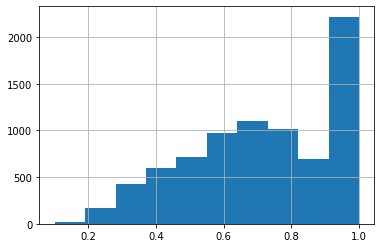

In [ ]:
train['baseline category'].hist()
plt.show()

## **EDA**

### **Testing Set**

#### (1) Split to "AGREE" and "DISAGREE"

In [ ]:
test_agree = test_raw[test_raw['s'] == "AGREE"].copy()
test_disagree = test_raw[test_raw['s'] == "DISAGREE"].copy()
print(test_agree.shape)
print(test_disagree.shape)

(367, 7)
(1649, 7)


#### (2) Word count distribution

##### AGREE

In [ ]:
test_agree.describe()

,id,q_count,r_count,qr_count
count,367.000000,367.000000,367.000000,367.000000
mean,4737.659401,52.765668,56.079019,108.844687
std,2796.688491,77.272066,71.348002,110.504656
min,5.000000,3.000000,2.000000,7.000000
25%,2563.500000,17.000000,15.000000,42.500000
50%,4475.000000,28.000000,34.000000,66.000000
75%,6764.000000,55.000000,62.000000,132.000000
max,9850.000000,713.000000,630.000000,729.000000


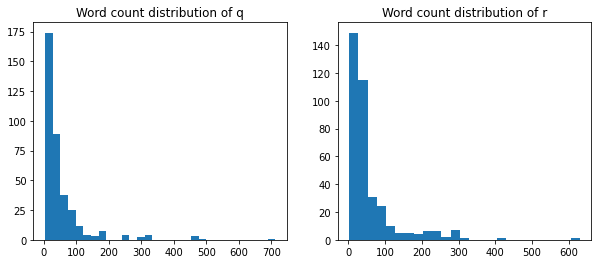

In [ ]:
def testWordCountDist(df):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax0.hist(df["q_count"], bins=30)
    ax0.set_title('Word count distribution of q')

    ax1.hist(df["r_count"], bins=25)
    ax1.set_title('Word count distribution of r')

    plt.show()

testWordCountDist(test_agree)

##### DISAGREE

In [ ]:
test_disagree.describe()

,id,q_count,r_count,qr_count
count,1649.000000,1649.000000,1649.000000,1649.000000
mean,4982.532444,49.651304,57.857489,107.508793
std,2715.164220,68.268541,74.793005,109.795784
min,1.000000,3.000000,1.000000,5.000000
25%,2869.000000,16.000000,15.000000,43.000000
50%,4923.000000,29.000000,34.000000,70.000000
75%,7095.000000,55.000000,66.000000,124.000000
max,9856.000000,713.000000,630.000000,729.000000


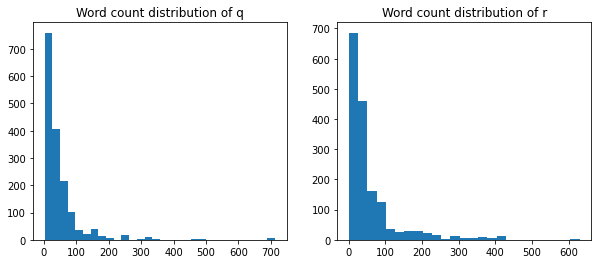

In [ ]:
testWordCountDist(test_disagree)

#### (3) String length distribution

In [ ]:
# test_raw['q_len'] = test_raw['q'].str.len()
# test_raw['r_len'] = test_raw['r'].str.len()
# test_raw

In [ ]:
# String length distribution of q
# test_raw["q_len"].hist(bins=15, grid=False)
# plt.show()

In [ ]:
# String length distribution of r
# test_raw["r_len"].hist(bins=15, grid=False)
# plt.show()

### **Training Set**

In [ ]:
print("q_count > 800: ", len(train[(train.q_count > 800)]))
print("r_count > 800: ", len(train[(train.r_count > 800)]))

q_count > 800:  28
r_count > 800:  28


In [ ]:
# Remove data that has more than 800 words
train = train[(train.q_count < 800) & (train.r_count < 800)]
train.shape

(7931, 14)

#### (1) Split to "AGREE" and "DISAGREE"

In [ ]:
train_agree = train[train['s'] == "AGREE"].copy()
train_disagree = train[train['s'] == "DISAGREE"].copy()
print(train_agree.shape)
print(train_disagree.shape)

(1433, 14)
(6498, 14)


#### (2) Word count distribution

##### AGREE

In [ ]:
train_agree.describe()

,id,q_count,r_count,qr_count,q_sum_count,r_sum_count,qr_sum_count,baseline,baseline category
count,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000
mean,4869.445220,58.551989,53.958130,112.510119,26.335659,23.376832,49.712491,0.696665,0.734822
std,2917.079594,81.699435,70.010621,113.339112,23.932569,21.736624,35.425344,0.253529,0.240159
min,8.000000,1.000000,1.000000,4.000000,0.000000,1.000000,4.000000,0.082616,0.100000
25%,2385.000000,16.000000,14.000000,40.000000,13.000000,11.000000,29.000000,0.509444,0.600000
50%,4698.000000,32.000000,30.000000,75.000000,20.000000,18.000000,41.000000,0.705479,0.800000
75%,7471.000000,67.000000,67.000000,144.000000,32.000000,29.000000,59.000000,0.976636,1.000000
max,10003.000000,789.000000,636.000000,867.000000,324.000000,271.000000,358.000000,1.000000,1.000000


In [ ]:
train_agree[train_agree['q_sum_count'] == 0] 

,id,q,r,s,q',r',q_count,r_count,qr_count,q_sum_count,r_sum_count,qr_sum_count,baseline,baseline category
7213,9076,< giggle > .,And being an evil old darwinist I should add <...,AGREE,.,And being an evil old darwinist I should add,1,10,11,0,9,9,0.45,0.5


In [ ]:
train_agree = train_agree[train_agree['q_sum_count'] > 0] 
train_agree.shape

(1432, 14)

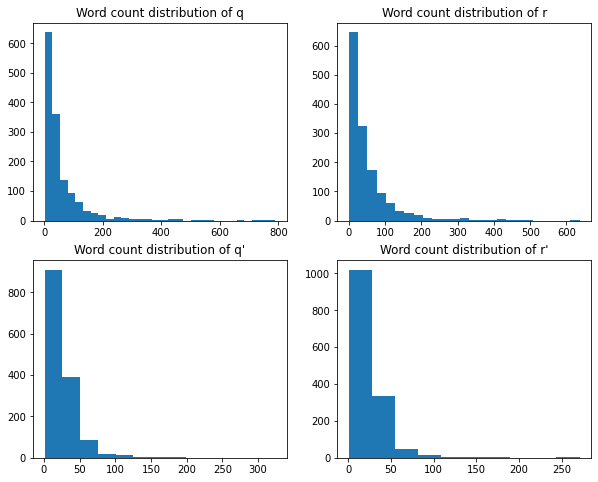

In [ ]:
# Word count distribution
def wordCountDist(df, binq, binr, binqq, binrr):
    fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

    ax0.hist(df["q_count"], bins=binq)
    ax0.set_title('Word count distribution of q')

    ax1.hist(df["r_count"], bins=binr)
    ax1.set_title('Word count distribution of r')

    ax2.hist(df["q_sum_count"], bins=binqq)
    ax2.set_title('Word count distribution of q\'')

    ax3.hist(df["r_sum_count"], bins=binrr)
    ax3.set_title('Word count distribution of r\'')

    plt.show()

wordCountDist(train_agree, 30, 25, 13, 10)

##### DISAGREE

In [ ]:
train_disagree.describe()

,id,q_count,r_count,qr_count,q_sum_count,r_sum_count,qr_sum_count,baseline,baseline category
count,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000
mean,5053.471222,49.841490,62.265005,112.106494,24.480302,26.794244,51.274546,0.687609,0.726223
std,2928.000223,64.909723,74.486629,106.351865,18.280660,24.486890,34.307329,0.245869,0.234487
min,11.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,0.062304,0.100000
25%,2440.250000,17.000000,19.000000,47.000000,13.000000,14.000000,32.000000,0.510356,0.600000
50%,5093.500000,31.000000,39.000000,80.000000,21.000000,22.000000,44.000000,0.693878,0.700000
75%,7616.750000,56.000000,77.000000,138.000000,31.000000,33.000000,61.000000,0.934783,1.000000
max,10002.000000,737.000000,761.000000,1190.000000,292.000000,396.000000,494.000000,1.000000,1.000000


In [ ]:
train_disagree[train_disagree['q_count'] == 0] 
train_disagree[train_disagree['r_count'] == 0] 

,id,q,r,s,q',r',q_count,r_count,qr_count,q_sum_count,r_sum_count,qr_sum_count,baseline,baseline category
2001,2429,"Well , considering that quote comes from someb...",...,DISAGREE,Well considering that comes from somebody whos...,...,27,0,27,26,0,26,0.981481,1.0
7940,9957,"Some would say , the answer is that man is bot...",.........,DISAGREE,the answer is that man is both a physical bein...,.........,76,0,76,20,0,20,0.631579,0.7


In [ ]:
train_disagree = train_disagree[train_disagree['q_count'] > 0] 
train_disagree = train_disagree[train_disagree['r_count'] > 0] 
train_disagree.shape

(6495, 14)

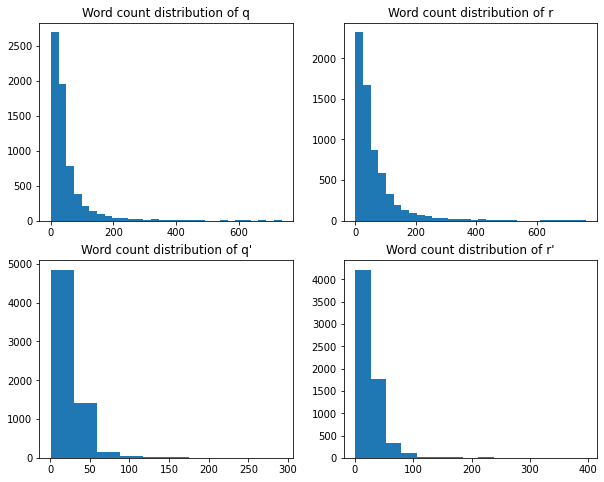

In [ ]:
# Word count distribution
wordCountDist(train_disagree, 30, 30, 10, 15)

#### (3) Find the summary that is the same as the original text

##### AGREE

In [ ]:
print("Total AGREE:", train_agree.shape)
print("AGREE q = q':")
q_agree_same = train_agree[train_agree['q_count'] == train_agree['q_sum_count']] 
q_agree_same['q_count'].describe()

Total AGREE: (1432, 14)
AGREE q = q':


count    582.000000
mean      22.024055
std       23.219363
min        1.000000
25%       10.000000
50%       16.000000
75%       26.000000
max      260.000000
Name: q_count, dtype: float64

In [ ]:
print("Total AGREE:", train_agree.shape)
print("AGREE r = r':")
r_agree_same = train_agree[train_agree['r_count'] == train_agree['r_sum_count']] 
r_agree_same['r_count'].describe()

Total AGREE: (1432, 14)
AGREE r = r':


count    592.000000
mean      17.505068
std       19.938738
min        1.000000
25%        7.000000
50%       13.000000
75%       21.000000
max      271.000000
Name: r_count, dtype: float64

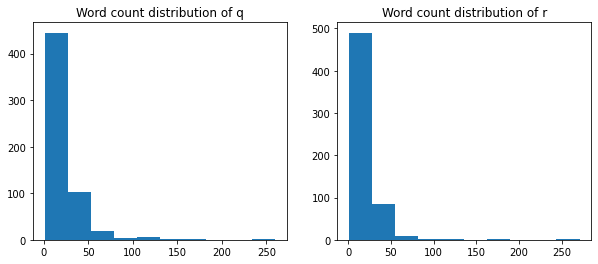

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax0.hist(q_agree_same["q_count"], bins=10)
ax0.set_title('Word count distribution of q')

ax1.hist(r_agree_same["r_count"], bins=10)
ax1.set_title('Word count distribution of r')

plt.show()

##### DISAGREE

In [ ]:
print("Total DISAGREE:", train_disagree.shape)
print("DISAGREE q = q':")
q_disagree_same = train_disagree[train_disagree['q_count'] == train_disagree['q_sum_count']] 
q_disagree_same['q_count'].describe()

Total DISAGREE: (6495, 14)
DISAGREE q = q':


count    2565.000000
mean       21.022222
std        18.087969
min         1.000000
25%        11.000000
50%        17.000000
75%        26.000000
max       292.000000
Name: q_count, dtype: float64

In [ ]:
print("Total DISAGREE:", train_disagree.shape)
print("DISAGREE r = r':")
r_disagree_same = train_disagree[train_disagree['r_count'] == train_disagree['r_sum_count']] 
r_disagree_same['r_count'].describe()

Total DISAGREE: (6495, 14)
DISAGREE r = r':


count    2234.000000
mean       21.322739
std        23.786013
min         1.000000
25%         9.000000
50%        15.000000
75%        26.000000
max       369.000000
Name: r_count, dtype: float64

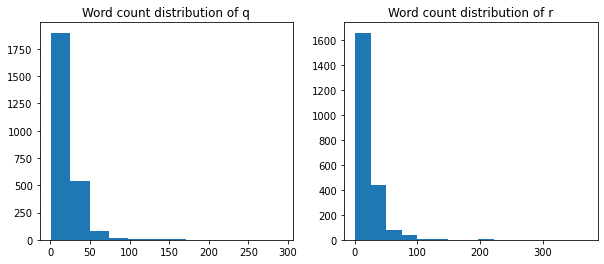

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax0.hist(q_disagree_same["q_count"], bins=12)
ax0.set_title('Word count distribution of q')

ax1.hist(r_disagree_same["r_count"], bins=15)
ax1.set_title('Word count distribution of r')

plt.show()

#### (4) LCS Distribution

##### AGREE

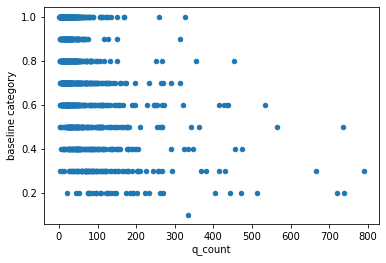

In [ ]:
# q_count
train_agree.plot(x='q_count', y='baseline category', kind='scatter')
plt.show()

切點：200

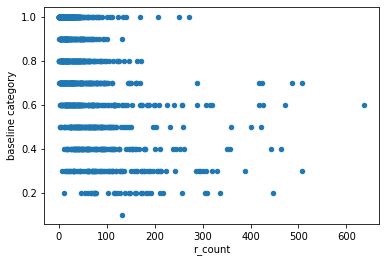

In [ ]:
# r_count
train_agree.plot(x='r_count', y='baseline category', kind='scatter')
plt.show()

切點：200

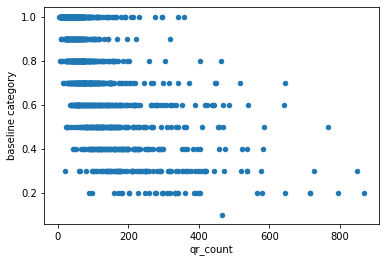

In [ ]:
# qr_count
train_agree.plot(x='qr_count', y='baseline category', kind='scatter')
plt.show()

切點：400

###### AGREE - q

In [ ]:
# Calcualte the baseline average LCS score of all the sample
def baselineLCS(df, col, threshold1, threshold2):
  subset = df[df[col] > threshold1]
  subset = subset[subset[col] <= threshold2]
  print(subset.shape)
  lcs_score_base = subset['baseline'].mean()
  print("Baseline LCS score:", lcs_score_base)
  subset.plot(x=col, y='baseline category', kind='scatter')
  plt.show()

(598, 14)
Baseline LCS score: 0.8343048908032717


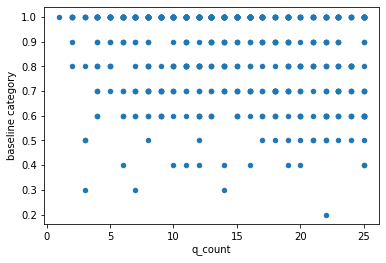

In [ ]:
baselineLCS(train_agree, 'q_count', 0, 25)

(588, 14)
Baseline LCS score: 0.6569313727550216


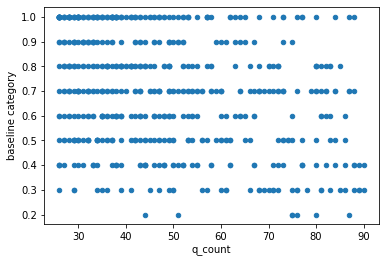

In [ ]:
baselineLCS(train_agree, 'q_count', 25, 90)

(246, 14)
Baseline LCS score: 0.4580509630991654


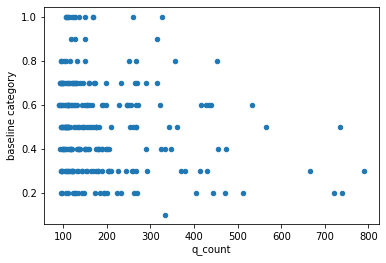

In [ ]:
baselineLCS(train_agree, 'q_count', 90, 800)

###### AGREE - r

(626, 14)
Baseline LCS score: 0.8451584789856521


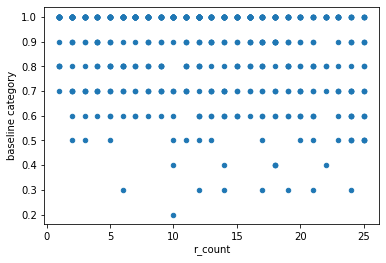

In [ ]:
baselineLCS(train_agree, 'r_count', 0, 25)

(573, 14)
Baseline LCS score: 0.6358064237389449


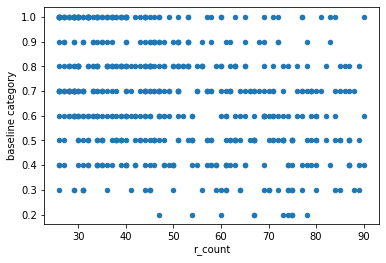

In [ ]:
baselineLCS(train_agree, 'r_count', 25, 90)

(233, 14)
Baseline LCS score: 0.4484301294217605


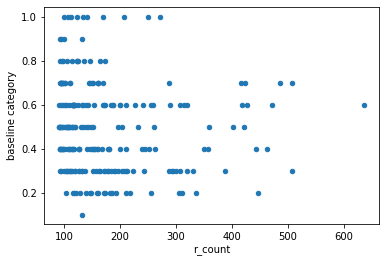

In [ ]:
baselineLCS(train_agree, 'r_count', 90, 800)

##### DISAGREE

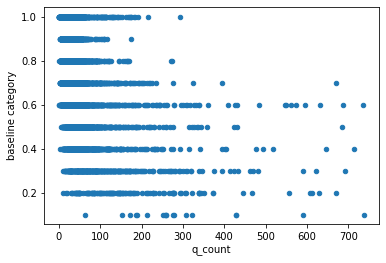

In [ ]:
# q_count
train_disagree.plot(x='q_count', y='baseline category', kind='scatter')
plt.show()

切點：250

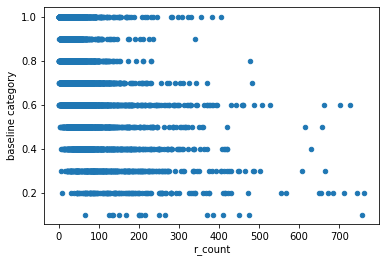

In [ ]:
# r_count
train_disagree.plot(x='r_count', y='baseline category', kind='scatter')
plt.show()

切點：300

###### DISAGREE - q

(1445, 14)
Baseline LCS score: 0.848101996613443


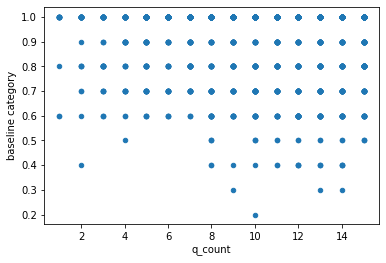

In [ ]:
baselineLCS(train_disagree, 'q_count', 0, 15)

(671, 14)
Baseline LCS score: 0.7331846767947348


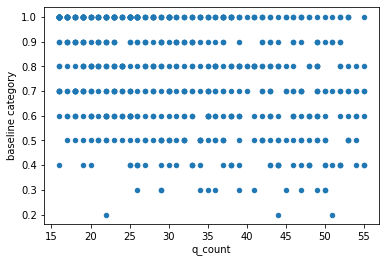

In [ ]:
baselineLCS(train_agree, 'q_count', 15, 55)

(419, 14)
Baseline LCS score: 0.5036841918585871


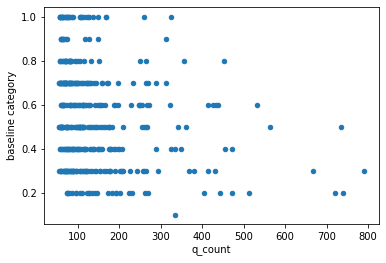

In [ ]:
baselineLCS(train_agree, 'q_count', 55, 800)

###### DISAGREE - r

(407, 14)
Baseline LCS score: 0.8682333551920102


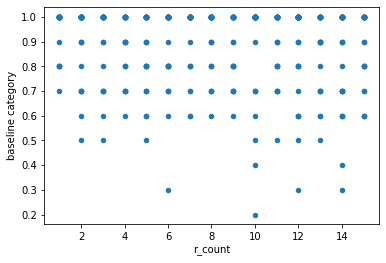

In [ ]:
baselineLCS(train_agree, 'r_count', 0, 15)

(792, 14)
Baseline LCS score: 0.6818375165205626


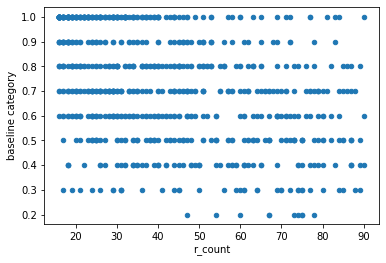

In [ ]:
baselineLCS(train_agree, 'r_count', 15, 90)

(233, 14)
Baseline LCS score: 0.4484301294217605


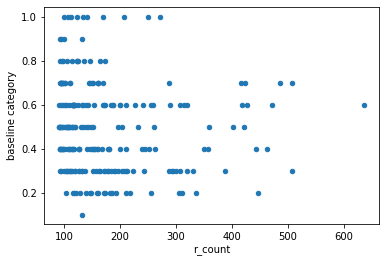

In [ ]:
baselineLCS(train_agree, 'r_count', 90, 800)

## **Split the dataset**
(1-25), (26-90), (90-800)

### **Training Set**

In [ ]:
threshold_min = 0
threshold_1 = 25
threshold_2 = 90
threshold_max = 800

def wordCountCategorize(q_or_r: str):
  if q_or_r == 'q':
    subset1 = train[(train.q_count > threshold_min) & (train.q_count <= threshold_1)]
    subset1 = subset1[['id', 'q', 'q\'', 'q_count', 'q_sum_count']]
    subset2 = train[(train.q_count > threshold_1) & (train.q_count <= threshold_2)]
    subset2 = subset2[['id', 'q', 'q\'', 'q_count', 'q_sum_count']]
    subset3 = train[(train.q_count > threshold_2) & (train.q_count <= threshold_max)]
    subset3 = subset3[['id', 'q', 'q\'', 'q_count', 'q_sum_count']]
  elif q_or_r == 'r':
    subset1 = train[(train.r_count > threshold_min) & (train.r_count <= threshold_1)]
    subset1 = subset1[['id', 'r', 'r\'', 'r_count', 'r_sum_count']]
    subset2 = train[(train.r_count > threshold_1) & (train.r_count <= threshold_2)]
    subset2 = subset2[['id', 'r', 'r\'', 'r_count', 'r_sum_count']]
    subset3 = train[(train.r_count > threshold_2) & (train.r_count <= threshold_max)]
    subset3 = subset3[['id', 'r', 'r\'', 'r_count', 'r_sum_count']]
  return subset1, subset2, subset3

In [ ]:
train_q_25, train_q_90, train_q_800 = wordCountCategorize("q")

print(train_q_25.shape)
print(train_q_90.shape)
print(train_q_800.shape)

(3292, 5)
(3583, 5)
(1055, 5)


In [ ]:
train_r_25, train_r_90, train_r_800 = wordCountCategorize("r")

print(train_r_25.shape)
print(train_r_90.shape)
print(train_r_800.shape)

(2863, 5)
(3563, 5)
(1503, 5)


### **Testing Set**

In [ ]:
def wordCountCategorize(q_or_r: str):
  if q_or_r == 'q':
    subset1 = test_raw[(test_raw.q_count > threshold_min) & (test_raw.q_count <= threshold_1)]
    subset1 = subset1[['id', 'q', 'q_count']]
    subset2 = test_raw[(test_raw.q_count > threshold_1) & (test_raw.q_count <= threshold_2)]
    subset2 = subset2[['id', 'q', 'q_count']]
    subset3 = test_raw[(test_raw.q_count > threshold_2) & (test_raw.q_count <= threshold_max)]
    subset3 = subset3[['id', 'q', 'q_count']]
  elif q_or_r == 'r':
    subset1 = test_raw[(test_raw.r_count > threshold_min) & (test_raw.r_count <= threshold_1)]
    subset1 = subset1[['id', 'r', 'r_count']]
    subset2 = test_raw[(test_raw.r_count > threshold_1) & (test_raw.r_count <= threshold_2)]
    subset2 = subset2[['id', 'r', 'r_count']]
    subset3 = test_raw[(test_raw.r_count > threshold_2) & (test_raw.r_count <= threshold_max)]
    subset3 = subset3[['id', 'r', 'r_count']]
  return subset1, subset2, subset3

In [ ]:
test_q_25, test_q_90, test_q_800 = wordCountCategorize("q")

print(test_q_25.shape)
print(test_q_90.shape)
print(test_q_800.shape)
test_q_800.head()

(858, 3)
(922, 3)
(236, 3)


,id,q,q_count
7,6223,"Really , so you are totally knowable ? See abo...",244
8,963,"In essence , it seems as though the central cl...",244
9,1420,"STUTTGART , Germany - A 17-year-old gunman dre...",244
10,2066,"In principle , there is no difference between ...",244
11,5826,This book stands alone among many other public...,210


In [ ]:
test_r_25, test_r_90, test_r_800 = wordCountCategorize("r")

print(test_r_25.shape)
print(test_r_90.shape)
print(test_r_800.shape)
test_r_800.head()

(793, 3)
(903, 3)
(320, 3)


,id,r,r_count
7,6223,"Oh irrational-boy , please do try to understan...",293
8,963,"I 'd say no to the first part , and yes to the...",293
9,1420,Well is n't that interesting . Germany has muc...,293
10,2066,In the same sense that shooting an intruder wh...,293
11,5826,"It did n't say ~some~ supernatural entities , ...",360
